(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


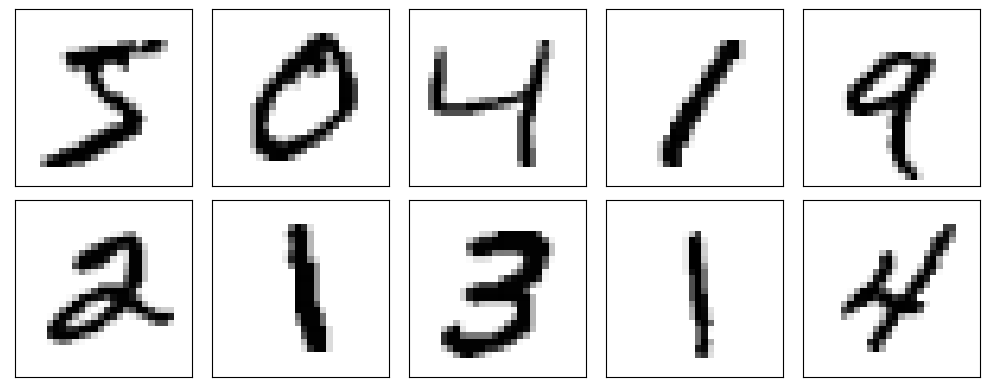

In [1]:
import tensorflow as tf
from tensorflow import keras


from keras.datasets import mnist

from matplotlib import pyplot as plt

import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

fig, axes = plt.subplots(2,5,figsize=(10,4)) #新建一个有10张子图的， 2行5列的画布
axes = axes.flatten() #axes中存储了每一个子图
for i in range(10):
    axes[i].imshow(x_train[i], cmap="gray_r") #将x_train的第i张图， 画在第1个子图上，反灰度图
    axes[i].set_xticks([])  #移除图像的x， y轴刻度
    axes[i].set_yticks([])
plt.tight_layout() #采用更紧凑美观的布局方式
plt.show()


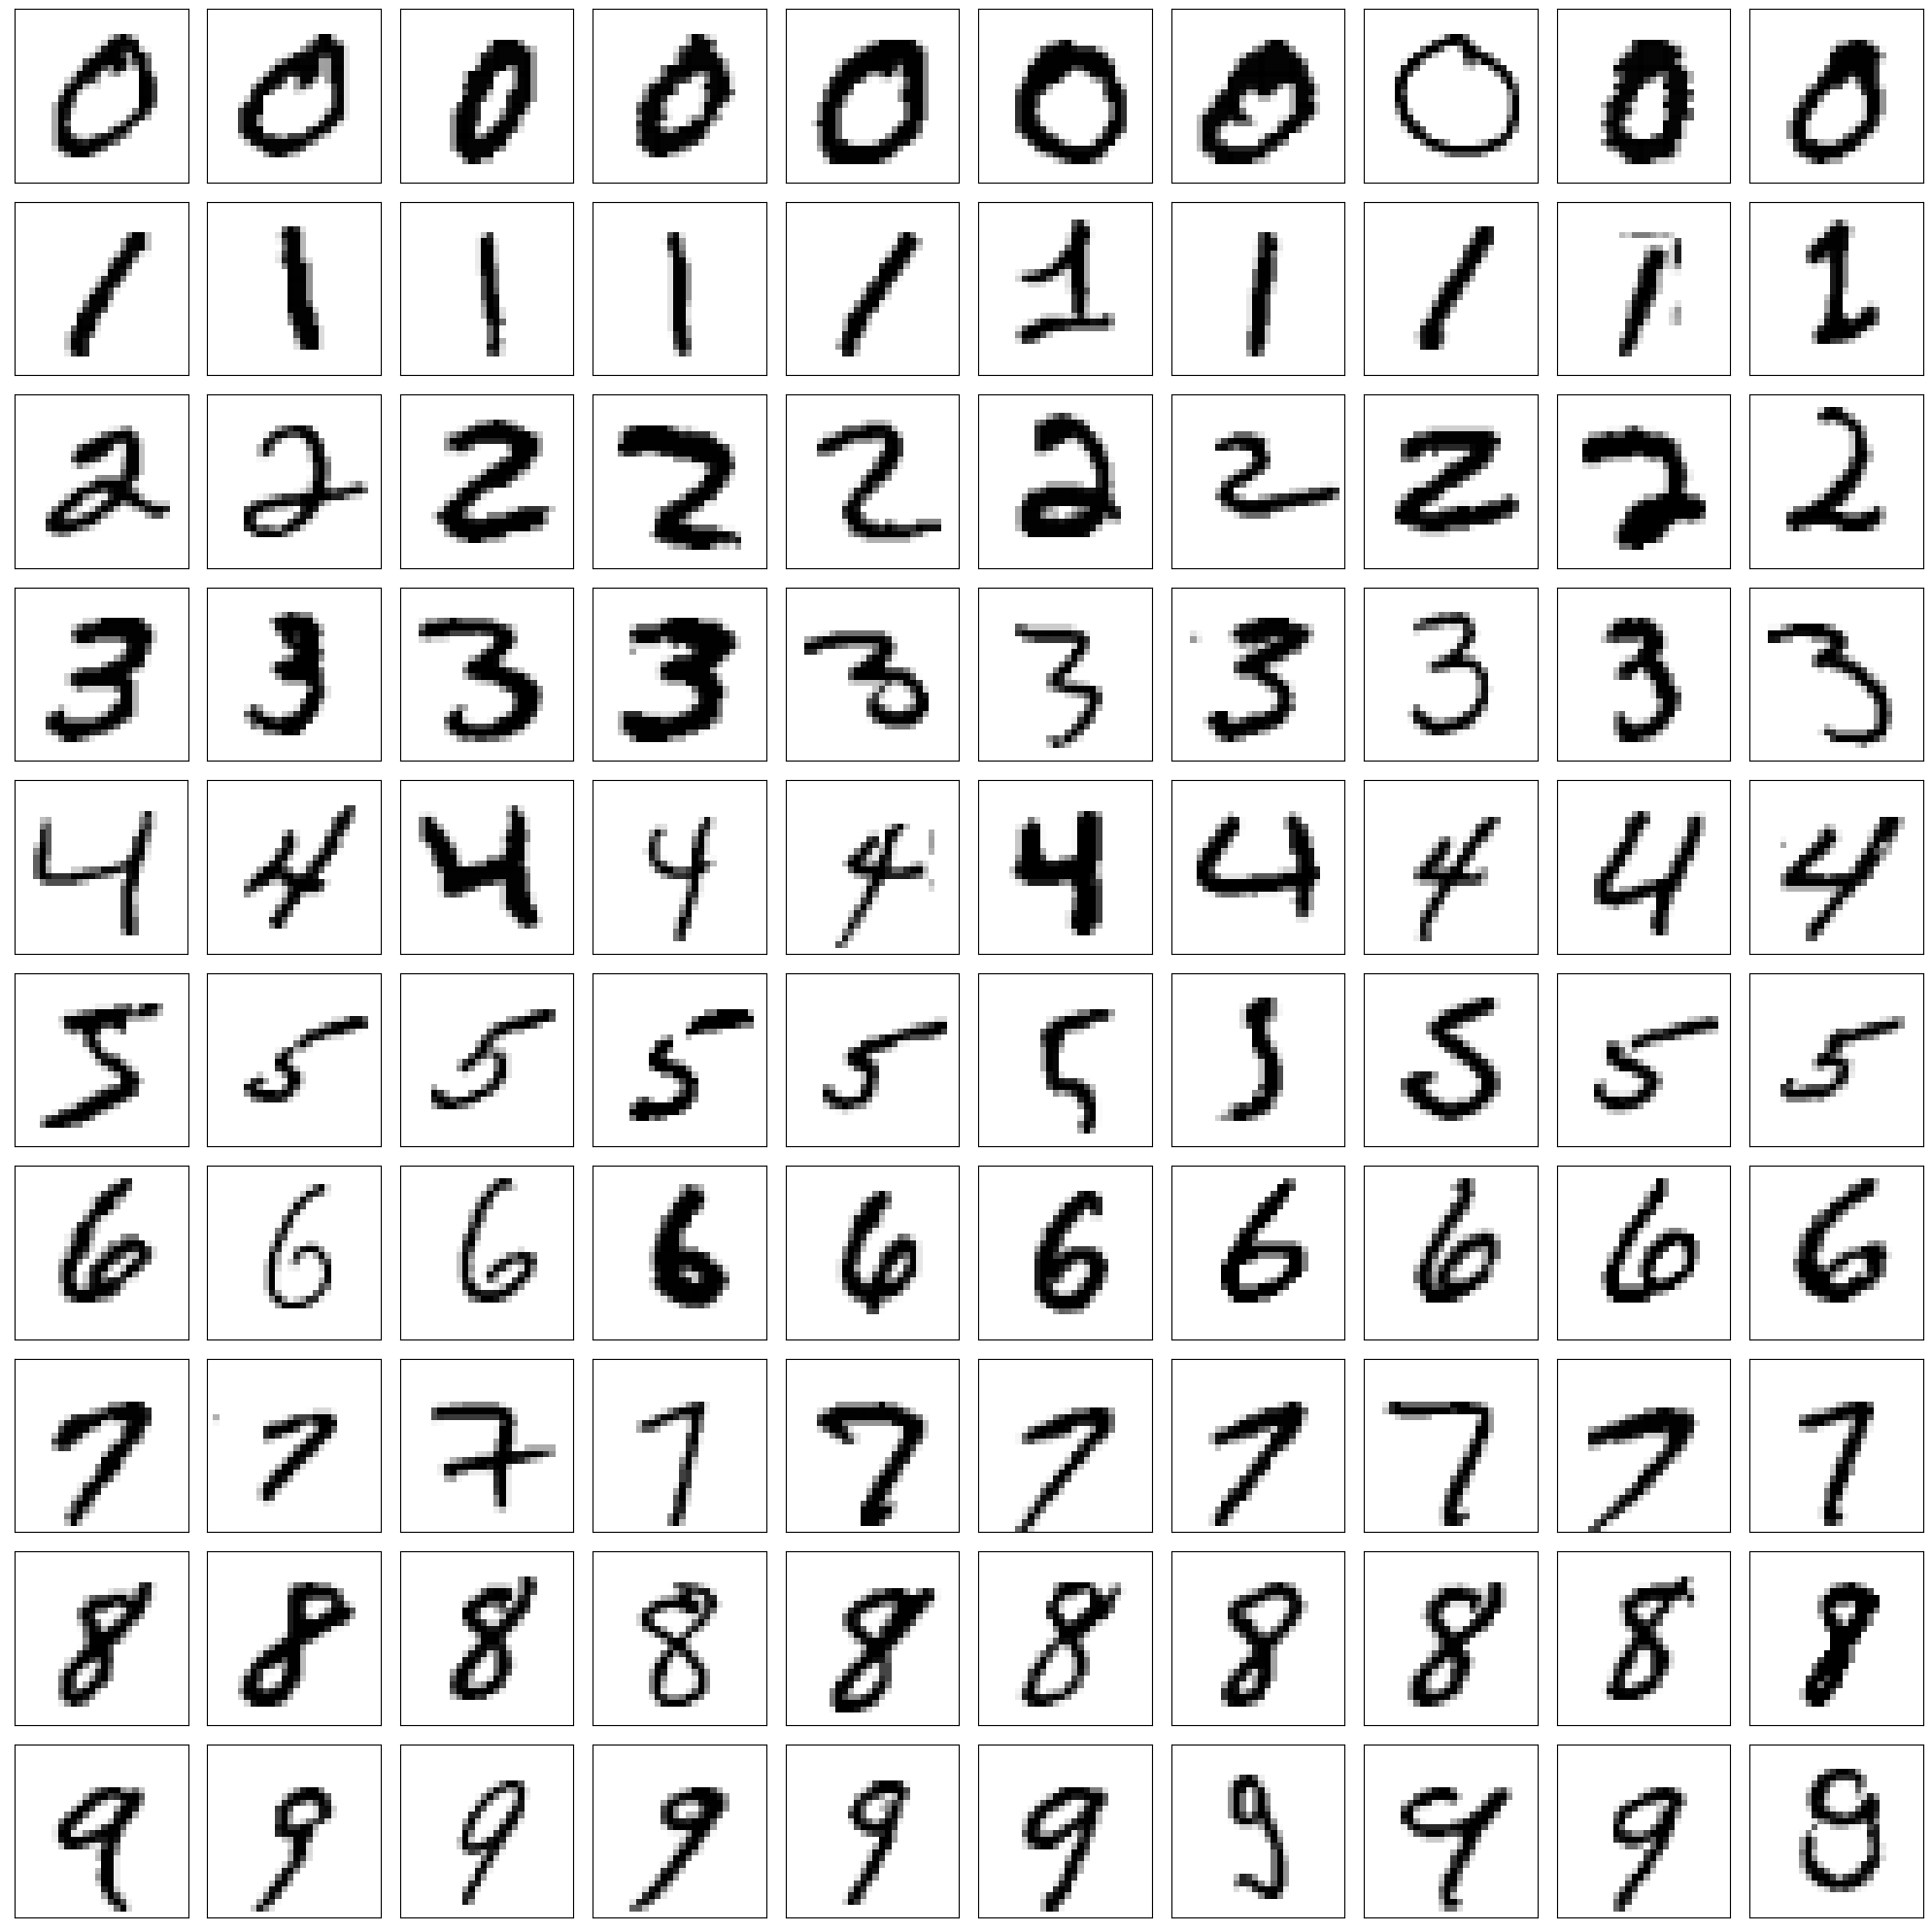

In [2]:
fig, axes = plt.subplots(10,10,figsize=(20,20)) #新建一个有100张子图的， 10行10列的画布

for i in range(10):
    indice = np.where(y_train==i)[0]
    for j in range(10):
        axes[i][j].imshow(x_train[indice[j]],cmap="gray_r")
        axes[i][j].set_xticks([])  #移除图像的x， y轴刻度
        axes[i][j].set_yticks([])
plt.tight_layout() #采用更紧凑美观的布局方式
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier
k=5
knc=KNeighborsClassifier(n_neighbors=k)

In [9]:
n_train=x_train.shape[0]
n_test=x_test.shape[0]
print(x_train.shape)
print(type(x_train))
x_train_1=x_train.reshape(n_train,-1)  #-1表示最后一个维度让电脑自己算
x_test_1=x_test.reshape(n_test, -1)
print(x_train_1.shape)

(60000, 28, 28)
<class 'numpy.ndarray'>
(60000, 784)


In [ ]:
#开始训练
import time

start_time=time.time()
print("pre fit:" + str(start_time))

knc.fit(x_train_1, y_train)

end_time=time.time()
print("fit done:"+str(end_time))
print("duration:" + str(end_time-start_time))

pre fit:1633950283.0298073


In [6]:
n_to_predict=10000
y_predict=knc.predict(x_test_1[0:n_to_predict])

In [7]:
print(y_predict[0:n_to_predict].shape)
print(y_test[0:n_to_predict].shape)
accuracy= np.sum(y_predict[0:n_to_predict]==y_test[0:n_to_predict])/ n_to_predict
print(accuracy)

(10000,)
(10000,)
0.9688


[3597 1865 4374 8416 1192 1754 1865 2758 2863 9904]


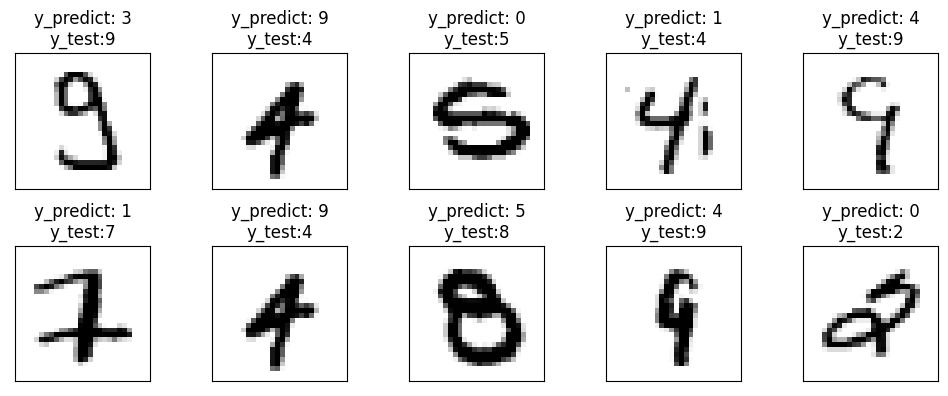

In [8]:
error_id=np.random.choice(np.where(y_predict[0:n_to_predict] !=y_test[0:n_to_predict])[0], size=10)
print(error_id)
fig, axes=plt.subplots(2,5, figsize=(10,4))
# print(axes.shape)
axes=axes.flatten()
# print(axes.shape)
for i, idx in enumerate(error_id):
    axes[i].imshow(x_test[idx].reshape(28,28), cmap="gray_r")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("y_predict: %d\ny_test:%d" % (y_predict[idx], y_test[idx]))
plt.tight_layout()
plt.show()
    